# **Prepare datasets**

Kita akan memakai dataset NusaX dari paper [berikut](https://arxiv.org/pdf/2205.15960.pdf). Dataset bisa diunduh di [sini](https://drive.google.com/drive/folders/1z1V_dGuEgjZJ2RiauaEcGLkHjBMAwcuO?usp=sharing). Di dalamnya terdapat "train.csv", "valid.csv", dan "test.csv". 

Setelah kita download dataset, kita upload ke Google Colab. Setelah itu kita panggil dengan Pandas dan karena file nya terpisah, kita gabung menjadi 1. 

In [2]:
import pandas as pd

df = pd.read_csv('Data/Data training/train_preprocess.tsv', delimiter='\t')

C:\Users\hp\AppData\Local\Temp\ipykernel_34620\2428041724.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df.shape

(10999, 2)

In [4]:
df.columns = ['text', 'label']

df.head()

,text,label
0,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
1,lokasi strategis di jalan sumatera bandung . t...,positive
2,betapa bahagia nya diri ini saat unboxing pake...,positive
3,duh . jadi mahasiswa jangan sombong dong . kas...,negative
4,"makanan beragam , harga makanan di food stall ...",positive


In [5]:
df.label.value_counts()

label
positive    6415
negative    3436
neutral     1148
Name: count, dtype: int64

Kita cek isi datasetnya dan di dalamnya terdapat 10999 data. Terdiri dari:


*   Positive: 6415
*   Neutral: 3436
*   Negative: 1148



# **Text Normalization/Cleansing**

Lalu kita lakukan cleansing sebagai berikut,
1. Membuat fungsi stopwords removal, 
- Masukin stopwords removal jadi fungsi

In [6]:
# import re 

# def cleansing(sent):
#     # Mengubah kata menjadi huruf kecil semua dengan menggunakan fungsi lower()
#     string = sent.lower()
#     # Menghapus emoticon dan tanda baca menggunakan "RegEx" dengan script di bawah
#     string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
#     return string

In [7]:
import re 
def cleansing(sent):
    text = sent.lower() #lowercase
    text = text.strip() #menghapus spasi di awal dan akhir
    text = re.sub(r'\n', ' ', text, flags=re.IGNORECASE)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text)
    text = re.sub(r'(.)\1\1+', r'\1', text) #menghapus karakter berulang
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) #menghapus karakter non-alpanumerik
    text = re.sub(r'[øùºðµ¹ª³]', '', text, flags=re.IGNORECASE)
    text = re.sub(r'â', 'a', text, flags=re.IGNORECASE)
    text = re.sub(r'\s+', ' ', text).strip() #menghapus spasi berlebih dan mengganti dengan satu spasi
    text = re.sub(r'^\s+$', '', text) #menghapus seluruh kalimat yg hanya berisi spasi
    
    return text

In [8]:
import sys
print(sys.path)


['c:\\Users\\hp\\Documents\\DSC23001042-15-tar-challenge-gold\\23001042-15-kel3-challenge-platinum', 'c:\\Users\\hp\\AppData\\Local\\Programs\\Python\\Python311\\python311.zip', 'c:\\Users\\hp\\AppData\\Local\\Programs\\Python\\Python311\\DLLs', 'c:\\Users\\hp\\AppData\\Local\\Programs\\Python\\Python311\\Lib', 'c:\\Users\\hp\\AppData\\Local\\Programs\\Python\\Python311', '', 'c:\\Users\\hp\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages', 'c:\\Users\\hp\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\win32', 'c:\\Users\\hp\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\hp\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\Pythonwin']


In [9]:
import sys
sys.path.append('/path/to/nltk')

In [10]:
%pip install nltk

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords corpus (run once)
# nltk.download('stopwords')
# nltk.download('punkt')

def stopwordsremoval(text):
    # Sample text
    # text = "Contoh teks untuk tokenisasi dan penghapusan stopwords dalam bahasa Indonesia."

    # Tokenize text
    freq_tokens = word_tokenize(text.lower())  # Convert text to lowercase for consistent comparison

    # Get Indonesian stopwords
    list_stopwords = set(stopwords.words('indonesian'))

    # Remove stopwords from the tokenized text
    tokens_without_stopword = [word for word in freq_tokens if word not in list_stopwords]

    # Reconstruct the text without stopwords
    text_without_stopwords = ' '.join(tokens_without_stopword)

    # print(text_without_stopwords)
    return text_without_stopwords


In [12]:
# df['text_clean'] = df.text.apply(cleansing)

In [13]:
df['text_clean2'] = df['text'].apply(cleansing).apply(stopwordsremoval)

In [15]:
df.head()

,text,label,text_clean2
0,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus k212 mmbri hujjah partai diw...
1,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis jalan sumatera bandung nya ny...
2,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia nya unboxing paket barang nya b...
3,duh . jadi mahasiswa jangan sombong dong . kas...,negative,duh mahasiswa sombong kasih kartu kuning belaj...
4,"makanan beragam , harga makanan di food stall ...",positive,makanan beragam harga makanan food stall 10 ka...


# **Feature Extraction: Bag of Words**

Setelah itu kita lakukan Feature Extraction menggunakan metode Bag of Words

In [16]:
# Kita simpan teks ke dalam sebuah variabel
data_preprocessed = df.text_clean2.tolist()

In [17]:
data_preprocessed

['mohon ulama lurus k212 mmbri hujjah partai diwlh suara islam pecah pecah',
 'lokasi strategis jalan sumatera bandung nya nyaman sofa lantai 2 paella nya enak pas dimakan minum bir dingin appetiser nya enak enak',
 'betapa bahagia nya unboxing paket barang nya bagus menetapkan beli',
 'duh mahasiswa sombong kasih kartu kuning belajar usahlah politik selesai kuliah nya politik telat dasar mahasiswa',
 'makanan beragam harga makanan food stall 10 kasir suasana ramai perhatian parkir duduk',
 'pakai kartu kredit bca untung rugi',
 'unik bagus foto makanan enak pegawai ramah bersih luas wifi kencang harga standar sesuai nya menu masakan makanan barat indonesia menu favorit lychee mojito spagheti',
 'keluarga menikmati pengalaman kuliner menyenangkan rm sari sunda jalan setiabudhi bandung hubungan rm sari sunda jalan setiabudhi tuliskan maaf rekan rekan pembaca bingung suka restoran pelayanan restoran terbilang cepat',
 'bersyukur',
 'simcard indosat inaktiv gara gara lupa isi pulsa kabar 

In [18]:
# Untuk melakukan Feature Extraction, kita menggunakan library "Sklearn atau scikit-learn".
# Sklearn adalah library untuk melakukan task-task Machine Learning.
# "CountVectorizer" merupakan salah satu modul untuk melakukan "BoW"

from sklearn.feature_extraction.text import CountVectorizer

# Kita proses Feature Extraction
count_vect = CountVectorizer()
count_vect.fit(data_preprocessed)

X = count_vect.transform(data_preprocessed)
print ("Feature Extraction selesai")

Feature Extraction selesai


In [19]:
import pickle

pickle.dump(count_vect, open("feature.p", "wb"))

# **Prepare train & test datasets/Splitting Dataset**

Split dataset menjadi 80% untuk train dan 20% untuk test.

In [20]:
from sklearn.model_selection import train_test_split

classes = df.label

In [21]:
classes

0         neutral
1        positive
2        positive
3        negative
4        positive
           ...   
10994    positive
10995    positive
10996     neutral
10997    negative
10998    positive
Name: label, Length: 10999, dtype: object

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, classes, test_size = 0.2)

# Training (Neural Network)

Jalankan training dengan metode Neural Network. "MLPClassifier" merupakan salah satu modul dari "Neural Network" pada library Sklearn.

In [23]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier() 
model.fit(X_train, y_train)

print ("Training selesai")

In [28]:
pickle.dump(model, open("model.p", "wb"))

# **Evaluation**

Langkah selanjutnya adalah "Evaluation". Module "classification_report" dari Sklearn merupakan salah satu modul untuk melakukan "Evaluation". Pada tahap evaluasi ini kita akan menerapkan metode evaluasi Accuracy, Precision, Recall dan F1-Score.

In [29]:
from sklearn.metrics import classification_report

test = model.predict(X_test)

print ("Testing selesai")

print(classification_report(y_test, test)) 

Testing selesai
              precision    recall  f1-score   support

    negative       0.79      0.78      0.79       718
     neutral       0.78      0.65      0.71       218
    positive       0.87      0.91      0.89      1264

    accuracy                           0.84      2200
   macro avg       0.81      0.78      0.79      2200
weighted avg       0.84      0.84      0.84      2200



Hasilnya nilai F1 Score ada pada angka 0.81 untuk Negative, 0.68 untuk Neutral, dan 0.86 untuk Positive. Hasil ini bisa dikatakan cukup bagus untuk sebuah model.

## **Cross Validation**

Mekanisme evaluasi selanjutnya menggunakan "Cross Validation", yaitu merotasi porsi testing dari dataset agar bisa melihat model yang sudah kita buat stabil ketika dihadapkan pada data yang berbeda.

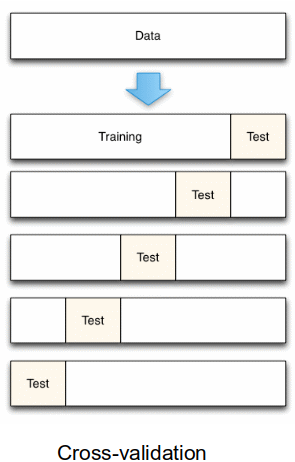

In [30]:
# Untuk lebih menyakinkan lagi, kita juga bisa melakukan "Cross Validation"
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

# n_splits bisa dikurangin biar ga panjang, ini 5 split butuh 155 menit
kf = KFold(n_splits=5,random_state=42,shuffle=True)

accuracies = []

y = classes

for iteration, data in enumerate(kf.split(X), start=1):

    data_train   = X[data[0]]
    target_train = y[data[0]]

    data_test    = X[data[1]]
    target_test  = y[data[1]]

    clf = MLPClassifier()
    clf.fit(data_train,target_train)

    preds = clf.predict(data_test)

    # for the current fold only    
    accuracy = accuracy_score(target_test,preds)

    print("Training ke-", iteration)
    print(classification_report(target_test,preds))
    print("======================================================")

    accuracies.append(accuracy)

# this is the average accuracy over all folds
average_accuracy = np.mean(accuracies)

print()
print()
print()
print("Rata-rata Accuracy: ", average_accuracy)

Training ke- 1
              precision    recall  f1-score   support

    negative       0.78      0.80      0.79       693
     neutral       0.76      0.70      0.73       213
    positive       0.89      0.89      0.89      1294

    accuracy                           0.84      2200
   macro avg       0.81      0.80      0.80      2200
weighted avg       0.84      0.84      0.84      2200

Training ke- 2
              precision    recall  f1-score   support

    negative       0.81      0.79      0.80       729
     neutral       0.85      0.62      0.71       247
    positive       0.86      0.92      0.89      1224

    accuracy                           0.84      2200
   macro avg       0.84      0.78      0.80      2200
weighted avg       0.84      0.84      0.84      2200



c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Training ke- 3
              precision    recall  f1-score   support

    negative       0.78      0.79      0.78       689
     neutral       0.75      0.67      0.71       216
    positive       0.88      0.90      0.89      1295

    accuracy                           0.84      2200
   macro avg       0.81      0.78      0.79      2200
weighted avg       0.84      0.84      0.84      2200

Training ke- 4
              precision    recall  f1-score   support

    negative       0.78      0.79      0.79       656
     neutral       0.79      0.70      0.74       230
    positive       0.89      0.90      0.90      1314

    accuracy                           0.85      2200
   macro avg       0.82      0.80      0.81      2200
weighted avg       0.85      0.85      0.85      2200

Training ke- 5
              precision    recall  f1-score   support

    negative       0.79      0.81      0.80       669
     neutral       0.79      0.63      0.70       242
    positive       0.89      0

Hasilnya nilai rata-rata accuracy pada angka 0.77. Ini menunjukkan model kita cukup stabil pada angka 0.77.

# Predict

Asumsi kita sudah oke dengan model yang dibikin, selanjutnya melakukan predict pada model untuk mengetes jika model sudah jalan.

Kita test pakai unseen data

In [31]:
data_test = pd.read_csv('Data unseen/data.csv')
data_test.head(3)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
# cara 1: cara manual
# original_text =  '''
# deklarasi pilkada 2018 aman dan anti hoax warga dukuh sari jabo
# '''

# cara2: cara pake unseen data dari gold challenge
input_form = data_test['Tweet'][0]

# Feature Extraction
# temen2 bisa lakukn cleansing regex yang ada di gold challenge
text = count_vect.transform([cleansing(input_form)])
# cleansing 

# Kita prediksi sentimennya
result = model.predict(text)[0]
print("Sentiment:")
print()
print(result)

print("=================================")
print("sebelum cleansing:", input_form)
print("setelah cleansing:", cleansing(input_form))

Sentiment:

positive
sebelum cleansing: - disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !'
setelah cleansing: disaat semua cowok berusaha melacak perhatian gue loe lantas remehkan perhatian yg gue kasih khusus ke elo basic elo cowok bego
